# Análise de Churn de assinatura - Case Petlove

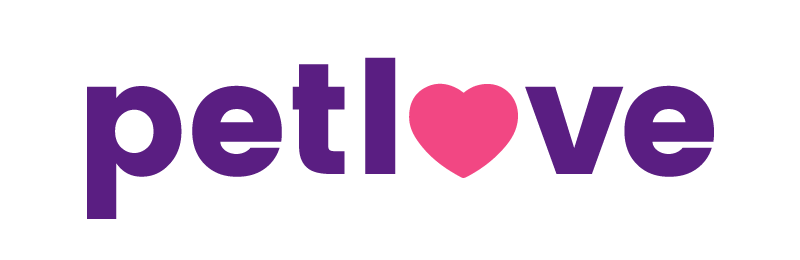


Notebook desenvolvido por Alisson de Souza Louly.

In [770]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import sidetable as stb
import seaborn as sns
import plotly.express as px

In [771]:
#Carregando a base
df = pd.read_csv('./data/data-test-analytics.csv')
df.head(3)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search
2,dc067cd2-c021-42bd-8c0e-beb267280e66,03/07/19 11:46 PM,01/07/21 11:23 AM,NaN,cb09e447ddc38283373d56bb46498e6a,668f4ee9add29c7bd02c485f1b7509e3,6cb47446a086ee6483b3eb954f11467a,03/18/63 12:00 AM,active,3.28.9,Lopes,RR,Estrela,01/07/21 11:23 AM,211.955597,13,2331.511572,11,42,organic_search


# Sanity Check

In [772]:
#Verificando dimensões
df.shape


(10000, 20)

In [773]:
#Verificando tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   created_at          10000 non-null  object 
 2   updated_at          10000 non-null  object 
 3   deleted_at          505 non-null    object 
 4   name_hash           10000 non-null  object 
 5   email_hash          10000 non-null  object 
 6   address_hash        10000 non-null  object 
 7   birth_date          10000 non-null  object 
 8   status              10000 non-null  object 
 9   version             10000 non-null  object 
 10  city                10000 non-null  object 
 11  state               10000 non-null  object 
 12  neighborhood        10000 non-null  object 
 13  last_date_purchase  10000 non-null  object 
 14  average_ticket      10000 non-null  float64
 15  items_quantity      10000 non-null  int64  
 16  all_r

In [774]:
#Transformando datas em formato datetime
df['created_at'] = pd.to_datetime(df['created_at'] )
df['updated_at'] = pd.to_datetime(df['updated_at'] )
df['deleted_at'] = pd.to_datetime(df['deleted_at'] )
df['birth_date'] = pd.to_datetime(df['birth_date'] )

In [775]:

df['created']=df['created_at'].dt.strftime('%m-%Y')
df['deleted']=df['deleted_at'].dt.strftime('%m-%Y')

In [776]:
#Tabela de frequências
df.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
status,10000,3,active,8524,canceled,505
marketing_source,10000,6,organic_search,3699,none,529
all_orders,10000,12,0,932,2,755
items_quantity,10000,19,8,1345,19,2
state,10000,27,TO,409,PI,338
deleted,505,54,12-2020,37,05-2016,1
created,10000,61,06-2016,199,02-2016,70
recency,10000,463,36,629,449,1
neighborhood,10000,482,Vila Antena,36,São Cristóvão,8
deleted_at,505,505,2018-06-17 23:59:00,1,2018-06-17 23:59:00,1


In [777]:
#Estatística Descritiva básica
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


In [778]:
#Verficiando o churn(status)
df.status.value_counts()/len(df)


active      0.8524
paused      0.0971
canceled    0.0505
Name: status, dtype: float64

In [779]:
#Verficiando se há linhas duplicadas
df.duplicated().sum()

0

In [780]:
#Verificando se há dados faltantes
df.isnull().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
created                  0
deleted               9495
dtype: int64

# Análise Exploratória

In [781]:
#Criando a coluna binária "churn" com resposta yes ou no
df['churn'] = np.where((df["status"]=='canceled'), 'yes','no')

In [782]:
df.churn.value_counts()/len(df)

no     0.9495
yes    0.0505
Name: churn, dtype: float64

Em toda a base a taxa de churn é de 5%

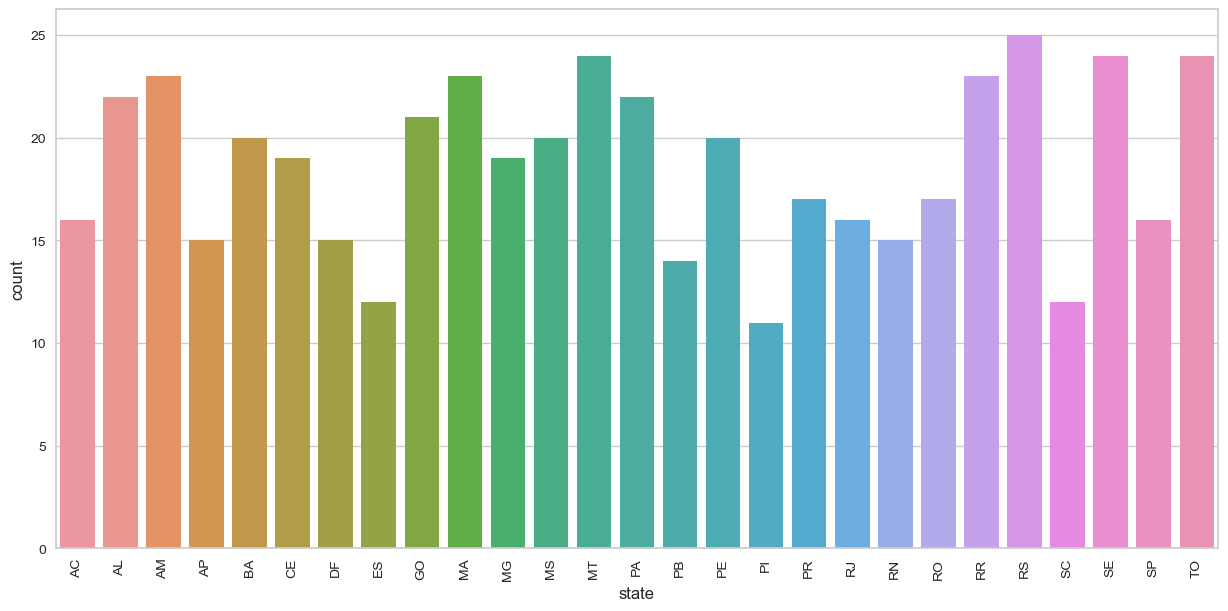

In [783]:
plt.figure(figsize=(15,7))
sns.countplot(df[df['churn']=='yes'].sort_values(by='state'), x='state')
plt.xticks(rotation= 90)
plt.show()

Estado não influência tanto na taxa de turn como é de se esperar

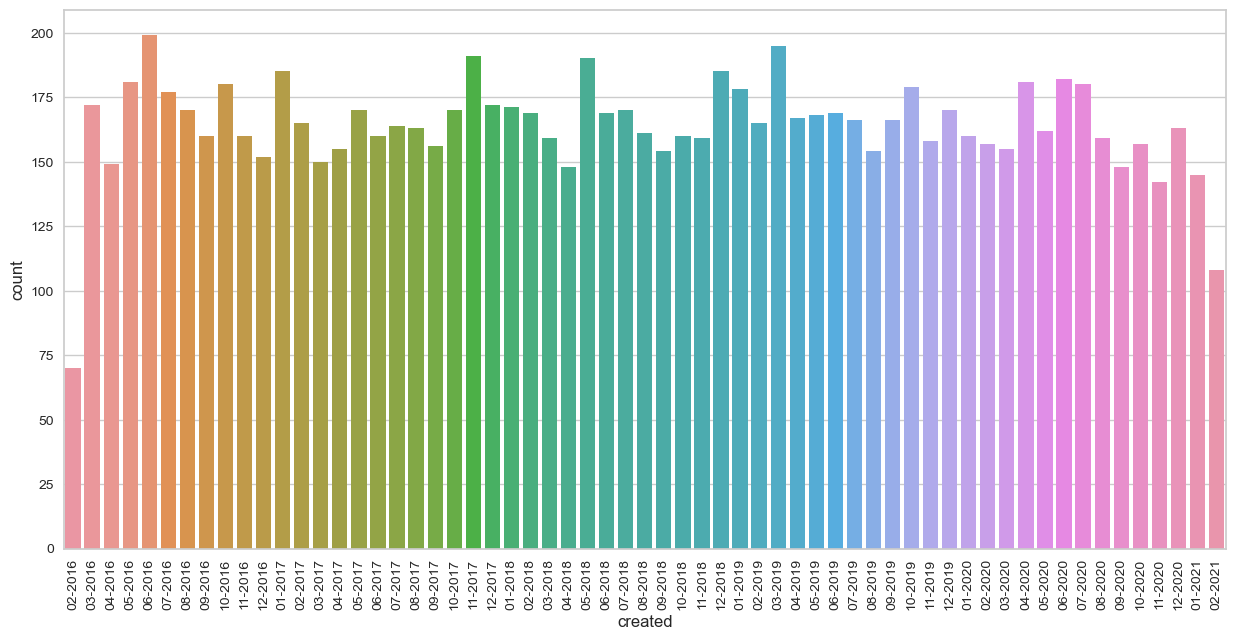

In [784]:
plt.figure(figsize=(15,7))
sns.countplot(df.sort_values(by='created_at'), x='created')
plt.xticks(rotation= 90)
plt.show()


A taxa de criação de assinaturas parece constante e não haver nenhuma tendência acentuada no intevalo observado.

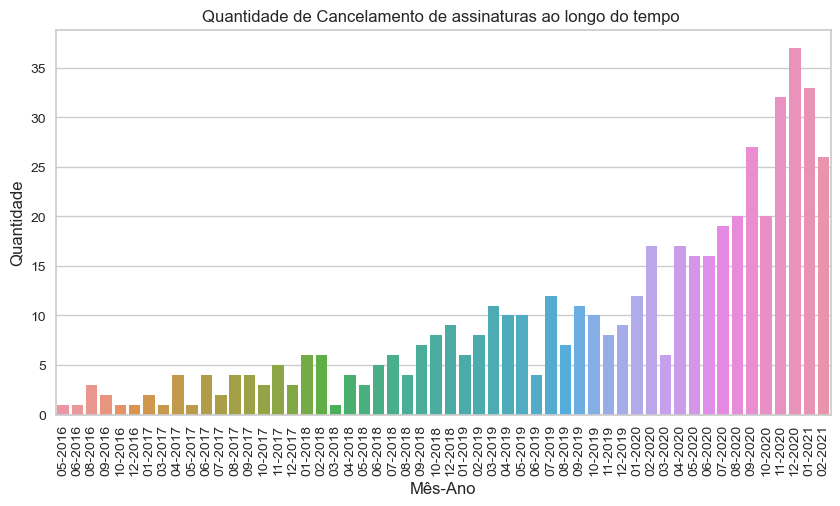

In [785]:
plt.figure(figsize=(10,5))
sns.countplot(df.sort_values(by='deleted_at'), x='deleted')
plt.xticks(rotation= 90)
plt.ylabel('Quantidade')
plt.xlabel('Mês-Ano')
plt.title('Quantidade de Cancelamento de assinaturas ao longo do tempo ')
plt.show()

Já na churn de assinaturas há uma tendência de crescimento a parti de 02-2020, que coincide com o início da pandemia de COVID-19 no Brasil

### average_ticket

<Axes: xlabel='churn', ylabel='average_ticket'>

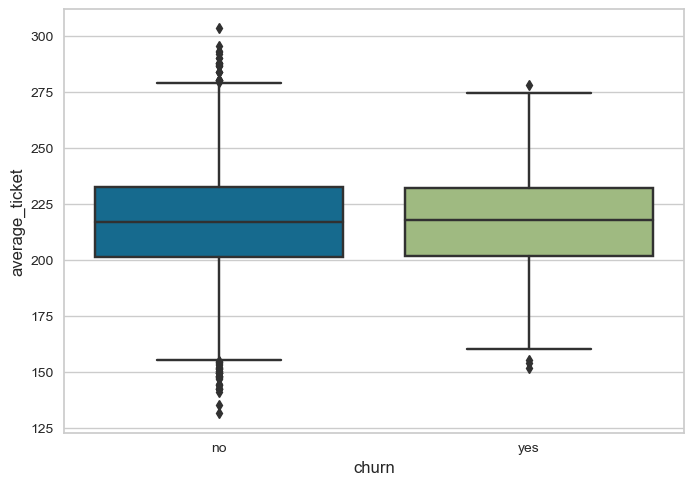

In [786]:
sns.boxplot(data = df,y=df["average_ticket"], x='churn')



O preço médio do ticket é praticamente o mesmo para quem cancela e quem não cancela, por volta de 217.

## items_quantity

In [787]:
df["items_quantity"].describe()

count    10000.00000
mean         8.49980
std          3.02604
min          1.00000
25%          6.00000
50%          8.00000
75%         11.00000
max         19.00000
Name: items_quantity, dtype: float64

<Axes: xlabel='churn', ylabel='items_quantity'>

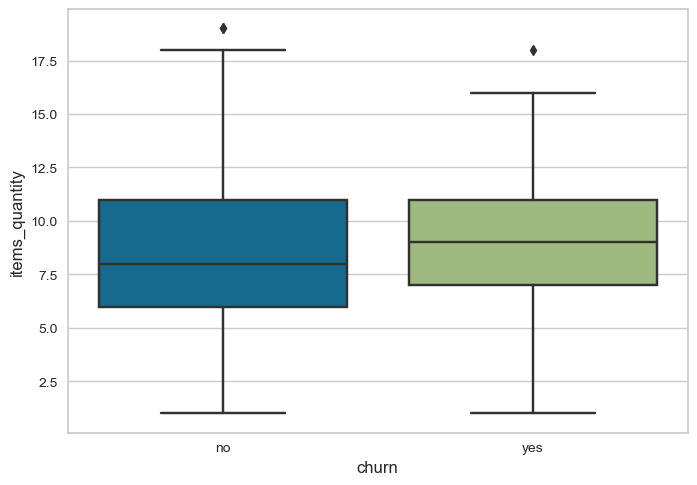

In [788]:
sns.boxplot(data = df,y=df["items_quantity"], x='churn')


Assim como ticket médio, a quantidade de items para cancela é praticamente a mesma  de quem não cancela a assinatura.

### all_orders

In [789]:
df['all_orders'].describe()

count    10000.000000
mean         5.415400
std          3.457577
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: all_orders, dtype: float64

<Axes: xlabel='churn', ylabel='all_orders'>

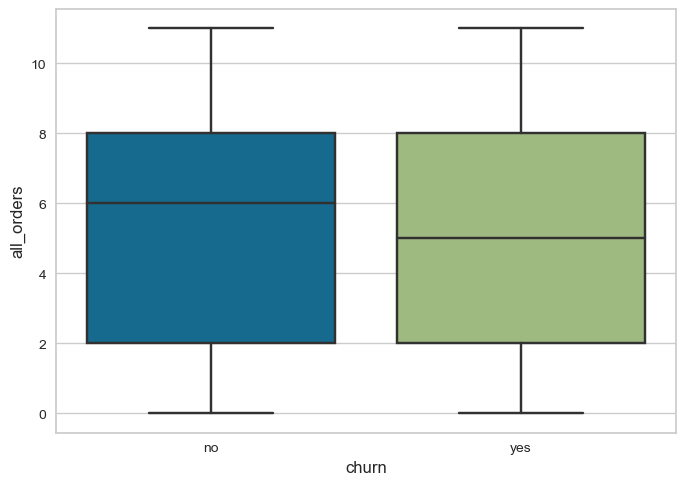

In [790]:
sns.boxplot(data = df,y=df["all_orders"], x='churn')


No geral, a quantidade de pedidos de quem cancela a assinatura também é a mesma de quem não.

### recency

In [791]:
df['recency'].describe()

count    10000.000000
mean        67.192900
std        175.723276
min          1.000000
25%         31.000000
50%         35.000000
75%         39.000000
max       1820.000000
Name: recency, dtype: float64

<Axes: xlabel='churn', ylabel='recency'>

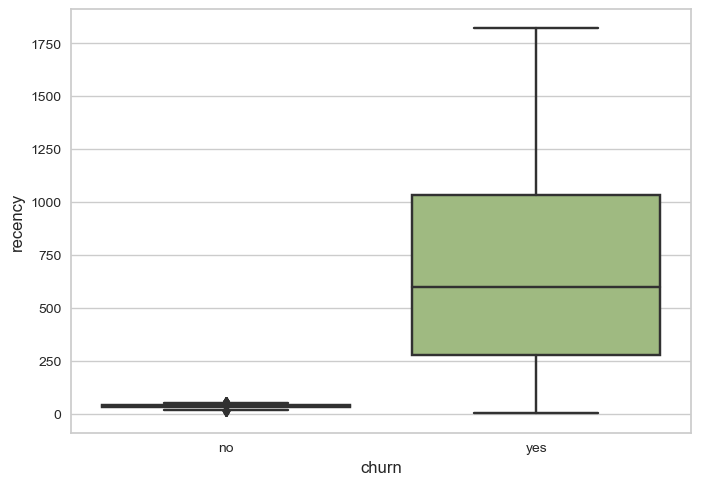

In [792]:
sns.boxplot(data = df,y=df["recency"], x='churn')

Recency é o tempo desde a última compra, considerando que o última data da base, então clientes que cancelaram há muito tempo terão um valor alto,
devido a natureza de como é calculada, essa coluna será desconsiderada.

### all revenue

In [793]:
df['all_revenue'].describe()

count    10000.000000
mean      1174.888603
std        763.141973
min          0.000000
25%        494.873564
50%       1172.751918
75%       1798.475045
max       3225.654163
Name: all_revenue, dtype: float64

<Axes: xlabel='churn', ylabel='all_revenue'>

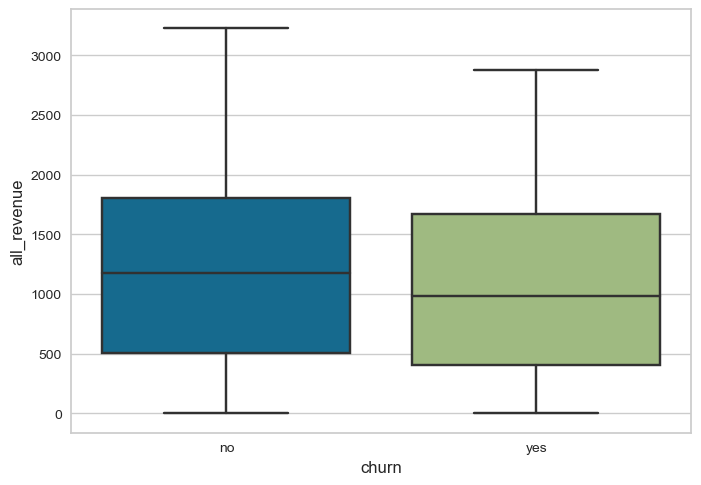

In [794]:
sns.boxplot(data = df,y=df["all_revenue"], x='churn')

Como a receita depende do total de pedidos e preço, logo terá uma distribuição semelhante as colunas anteriores, não apresentando grande diferença entre quem cancela ou não.

## marketing_source

In [795]:
#Função para criar um countplot e uma tabela de churn vs feature de entrada da base.

#Entrada: strind nome da coluna
#Saída um gráfico e uma tabela
def CountPlot_Table(feature):
    # Cria um countplot para churn vs coluna
    sns.countplot(x=feature, hue="churn", data=df, palette="Paired", edgecolor = 'Black', order=df[feature].value_counts().index)
    plt.xticks(rotation= 90)
    sns.despine()
    # Cria uma tabela para as proporções
    temp_table = pd.DataFrame(round(df.groupby(feature)['churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(2, 0,0.5 , 0.5))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

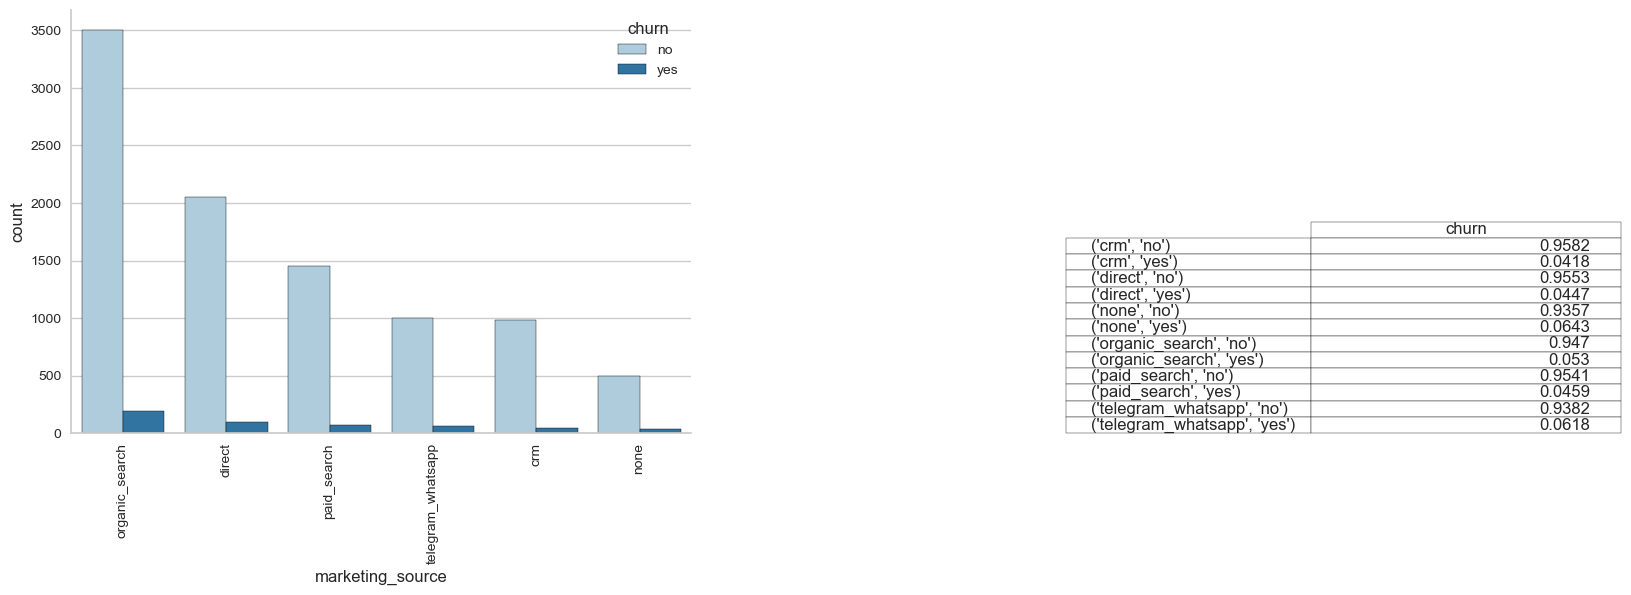

In [796]:
demo_features = ['marketing_source']
for feature in demo_features:
    CountPlot_Table(feature)

A taxa de churn por marketing_source também é parecida com o distribuição total da base, por volta de 4%~6% cada canal

## Feature Engineering

#### Tenure

In [797]:
#Função para criar o tempo de assinatura desde a data que a sua assinatura foi criada até a última data na base 
# Retorna a quandtidade de tempo em dias
def tempo_assinatura(started, canceled):
    maxdate = pd.to_datetime('28/02/2021') #última data na base
    if pd.isnull(canceled):
        tempo = round((maxdate-started )/pd.Timedelta(hours=24),0)
    else:
        tempo = round((canceled -started )/pd.Timedelta(hours=24),0)
    return tempo

In [798]:
df['tenure']=df.apply(lambda x: tempo_assinatura(x['created_at'],x['deleted_at']), axis =1 )

C:\Users\Alisson Louly\AppData\Local\Temp\ipykernel_34220\3916425232.py:4: UserWarning:

Parsing '28/02/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [799]:
#Distribuição da coluna tenure(tempo de assinatura)
df[df['churn']=='yes']['tenure'].describe()

count     505.000000
mean      472.203960
std       423.644964
min         0.000000
25%       134.000000
50%       322.000000
75%       751.000000
max      1771.000000
Name: tenure, dtype: float64

<Axes: xlabel='churn', ylabel='tenure'>

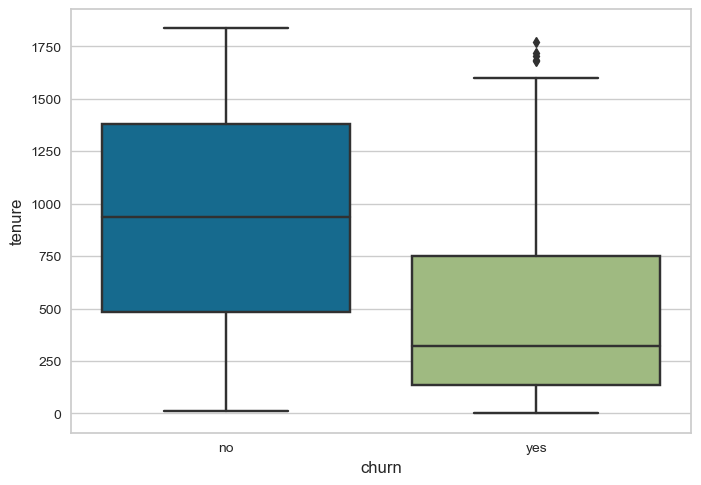

In [800]:
sns.boxplot(data = df,y="tenure", x='churn')

Aqui sim vemos que quem cancela a assinatura, 50% desses clientes tem até 322 dias de assinatura, ou seja, menos de 1 ano.E 75% dos clientes que cancelam até 2 anos de assinatura. 

### subscription_time

In [801]:
#Função que cria faixas de tempo para o tempo de assinatura. 
#Categorias: 'Up to 3 months','3-6 months','6-12 months','1-2 years','2-3 years','More than 3 years'

def subscription_time(tenure):
    if tenure <= 90:
        status = 'Up to 3 months'
    elif (tenure > 90) and (tenure <= 180):
        status = '3-6 months'
    elif (tenure > 180) and (tenure <= 365):
        status = '6-12 months'
    elif (tenure > 365) and (tenure <= 730):
        status = '1-2 years'
    elif (tenure > 730) and (tenure <= 1095):
        status = '2-3 years'
    elif tenure > 1095:
        status = 'More than 3 years'
    return status

In [802]:
#Aplicando a função subscription_time e criando essa coluna na base
df['subscription_time']=df['tenure'].apply(subscription_time)

In [803]:
df['subscription_time'].value_counts(normalize=True)

More than 3 years    0.3953
1-2 years            0.2003
2-3 years            0.1985
6-12 months          0.1079
Up to 3 months       0.0496
3-6 months           0.0484
Name: subscription_time, dtype: float64

### ticket

In [804]:
df['average_ticket'].describe()

count    10000.000000
mean       216.894709
std         22.757213
min        131.378672
25%        201.398851
50%        217.019478
75%        232.455042
max        303.386848
Name: average_ticket, dtype: float64

In [805]:
#Função que retorna 3 categorias de acordo com o preço do ticket
# Abaixo de 200 = below average, entre 200 e 232 =average,acima de 232 = above average.
def tipo_ticket(ticket):
    if ticket <= 200:
        status = 'below average'
    elif (ticket > 200) and (ticket <= 232):
        status = 'average'
    elif ticket > 232:
        status = 'above average'
    return status
    
     

In [806]:
#Aplicando a função tipo_ticket e criando essa coluna na base
df['ticket_type']=df['average_ticket'].apply(tipo_ticket)

In [807]:
df['ticket_type'].value_counts(normalize=True)

average          0.5138
above average    0.2560
below average    0.2302
Name: ticket_type, dtype: float64

### items_pattern

In [808]:
#Criando uma função que retorna a faixa de quantidade de itens adquiridos pelo cliente. 
# As saídas são: 'until 5','6 to 10' ou 'more than 10'
def items_padrao(items):
    if items <= 5:
        status = 'until 5'
    elif (items > 5) and (items <= 10):
        status = '6 to 10'
    elif items > 10:
        status = 'more than 10'
    return status

In [809]:
df['items_pattern'] = df['items_quantity'].apply(items_padrao)

#### expense

In [810]:
#Criando uma função que retorna o categorias de gasto de acordo com a receita total gerada por esse cliente
# As saídas são: 'low','mdoerate' , 'high' ou 'very high'
def tipo_expense(gasto):
    if gasto <= 500:
        status = 'low'
    elif (gasto > 500) and (gasto <= 1500):
        status = 'moderate'
    elif (gasto > 1500) and (gasto <= 2000):
        status = 'high'
    elif gasto > 2000:
        status = 'very high'
    return status

In [811]:
#Aplicando a função tipo_expense e criando a coluna expense na base
df['expense']=df['all_revenue'].apply(tipo_expense)

In [812]:
#Distribuição das categorias da coluna criada
df['expense'].value_counts(normalize=True)

moderate     0.3762
low          0.2515
high         0.1973
very high    0.1750
Name: expense, dtype: float64

#### orders_qtd

In [813]:
#Criando função que retorna faixas de acordo com a quantidade de pedidos "all_orders" na base
#As saídas são 'until 2','2 to 5','5-10' ou 'more than 8'
def orders_qtd(orders):
    if orders <= 2:
        status = 'until 2'
    elif (orders > 2) and (orders <= 5):
        status = '2 to 5'
    elif (orders > 5) and (orders <= 8):
        status = '5-10'
    elif orders > 8:
        status = 'more than 8'
    return status

In [814]:
#Criando a coluna "ordes_qtd" com a função orders_qtd
df['orders_qtd']=df['all_orders'].apply(orders_qtd)

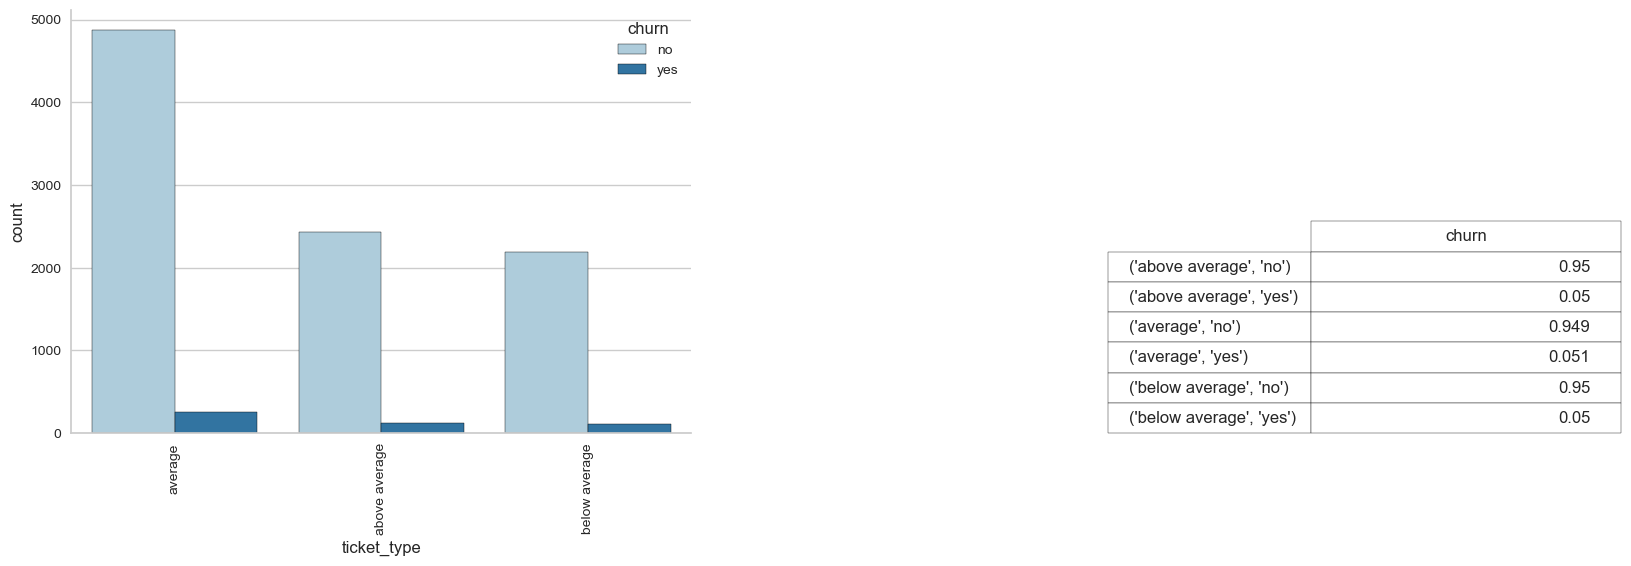

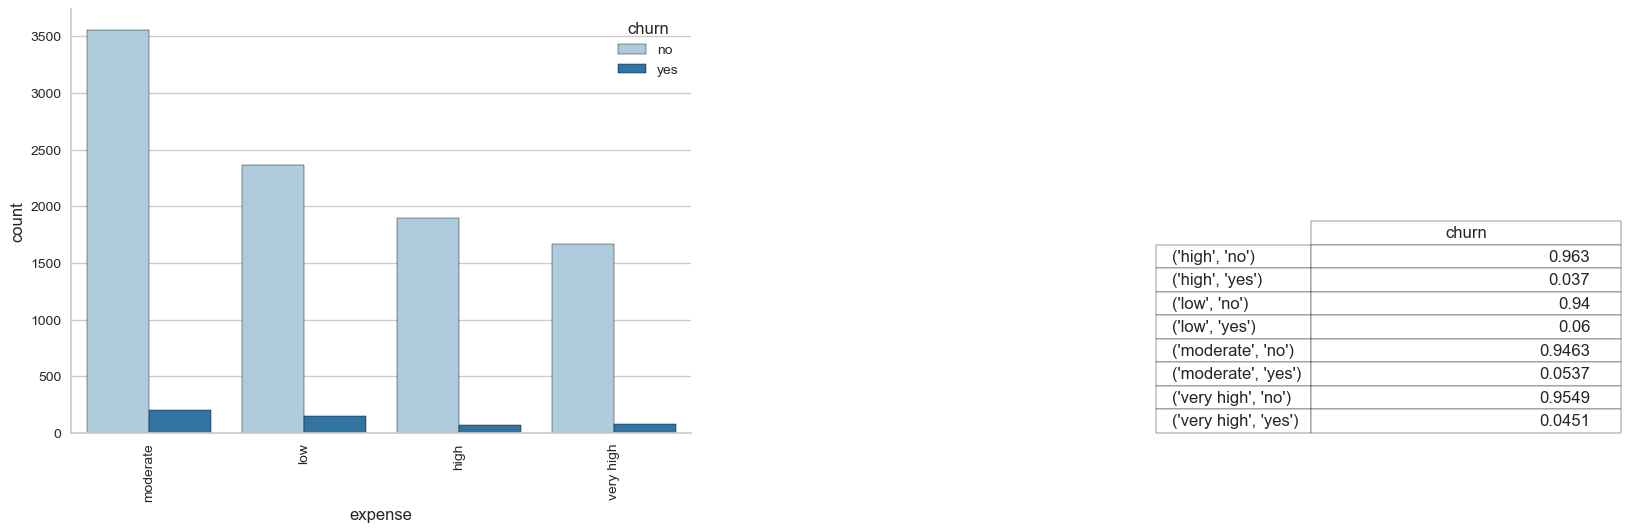

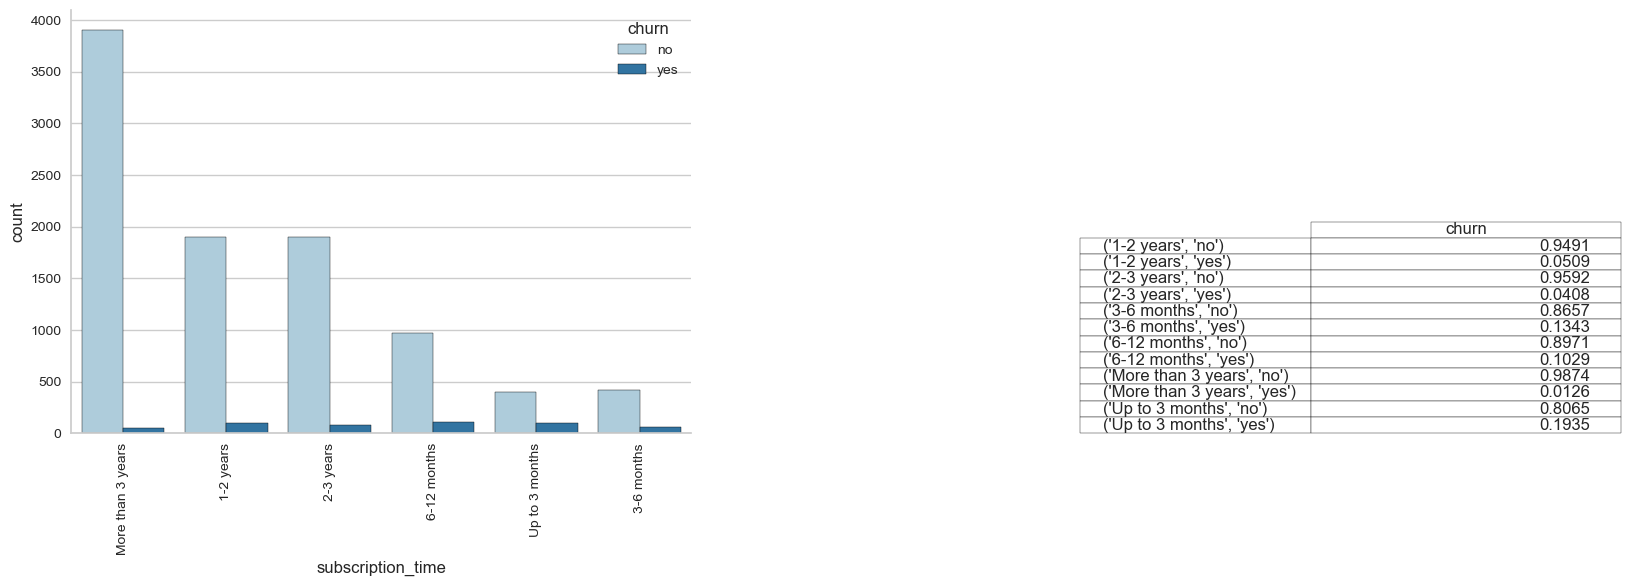

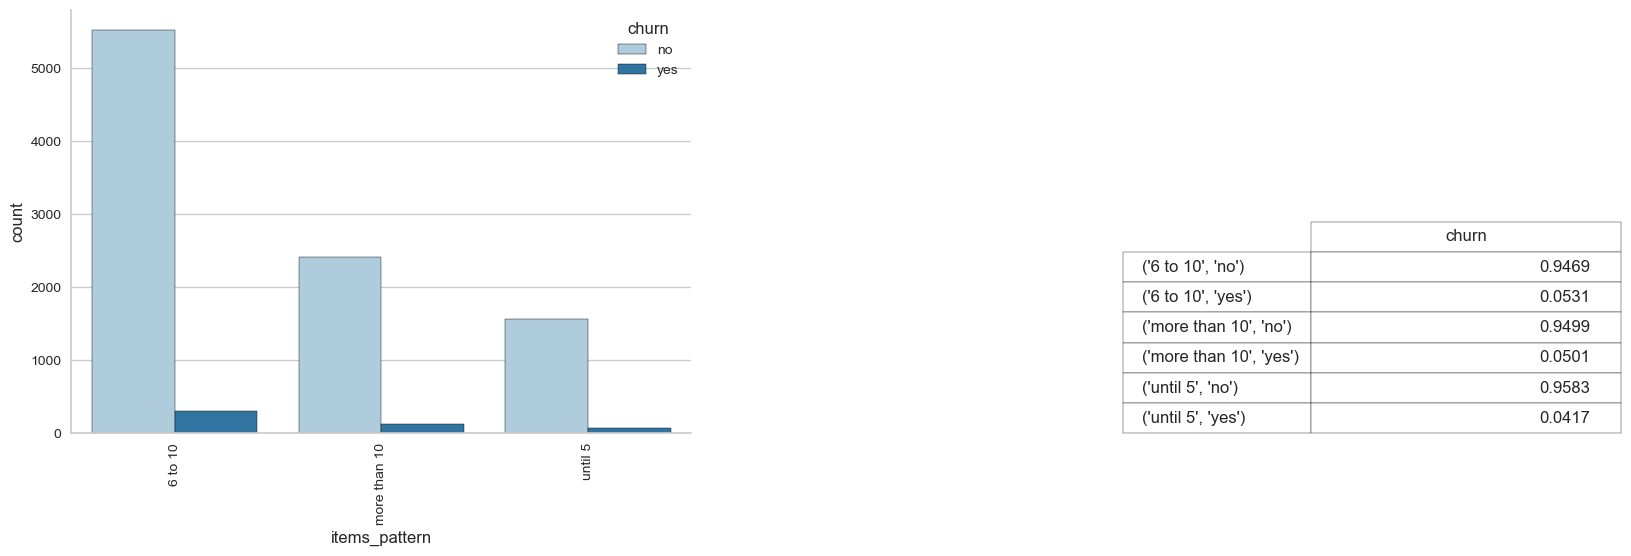

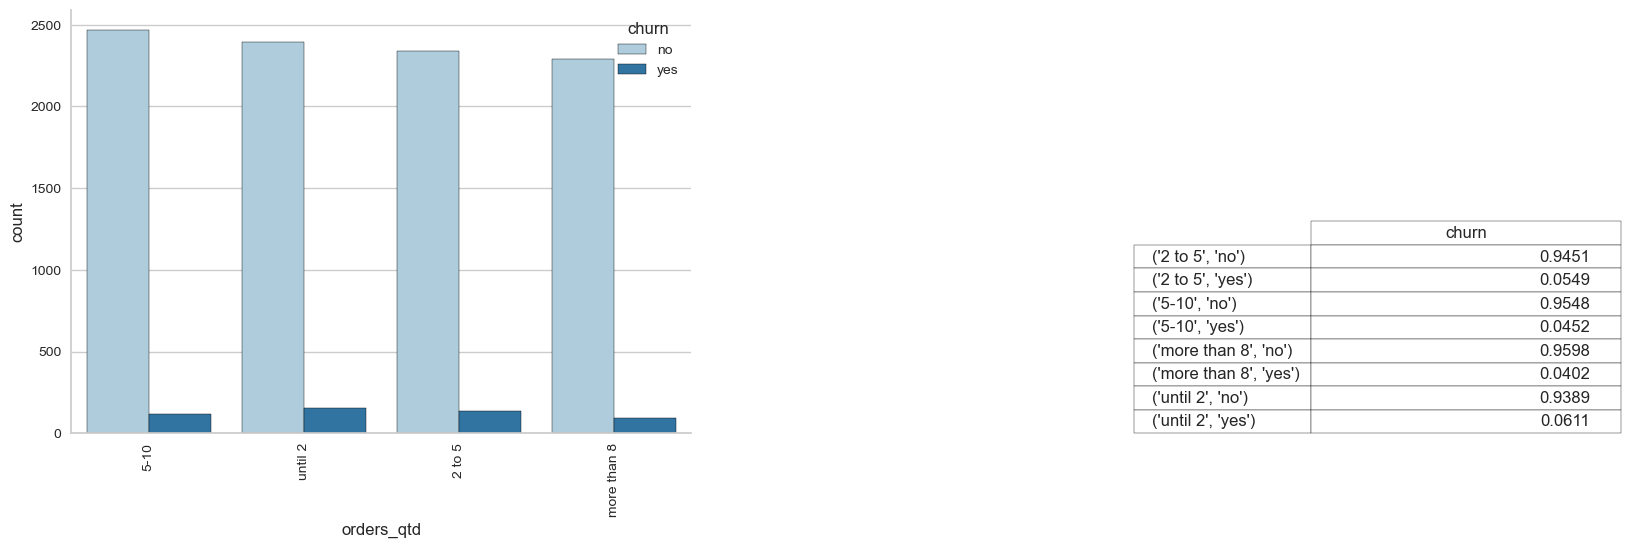

In [815]:
demo_features = ['ticket_type','expense','subscription_time','items_pattern','orders_qtd']
for feature in demo_features:
    CountPlot_Table(feature)

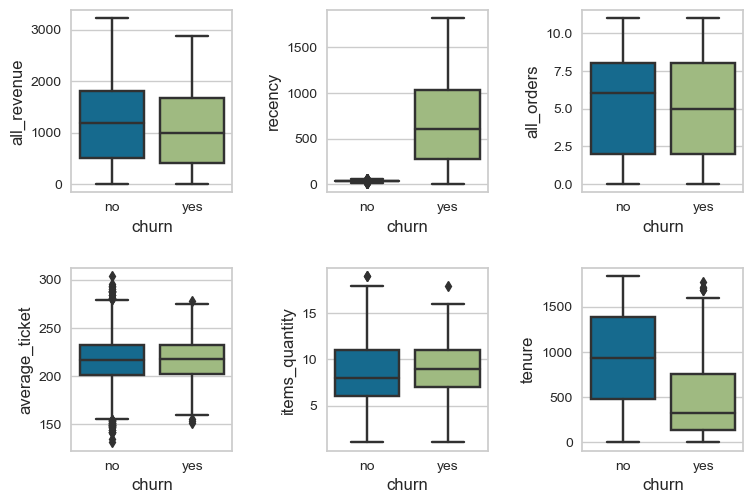

In [816]:
f, axes = plt.subplots(2,3)
sns.boxplot(  y="all_revenue", x= "churn", data=df , ax=axes[0,0])
sns.boxplot(  y="recency", x= "churn", data=df , ax=axes[0,1])
sns.boxplot(  y="all_orders", x= "churn", data=df, ax=axes[0,2])
sns.boxplot(  y="average_ticket", x= "churn", data=df, ax=axes[1,0])
sns.boxplot(  y="items_quantity", x= "churn", data=df, ax=axes[1,1])
sns.boxplot(  y="tenure", x= "churn", data=df, ax=axes[1,2])
f.tight_layout(pad=2)
plt.show()

**Analisando as variaveis criadas, confirma as hipóteses já exploradas acima, nem o gasto nem a quantidade de pedidos/items impactam muito no churn, porém no tempo no tempo de assinatura é possível observar que a taxa de churn de cliente com até 3 meses de base é de 19%, já de cliente de 3 a 6 meses essa taxa é de 13%, ou seja clientes novos, logo o problema de retenção de novos clientes é um problema. Abaixo há somente o gráfico da distribuição de tempo de assinaura por churn destacado.**

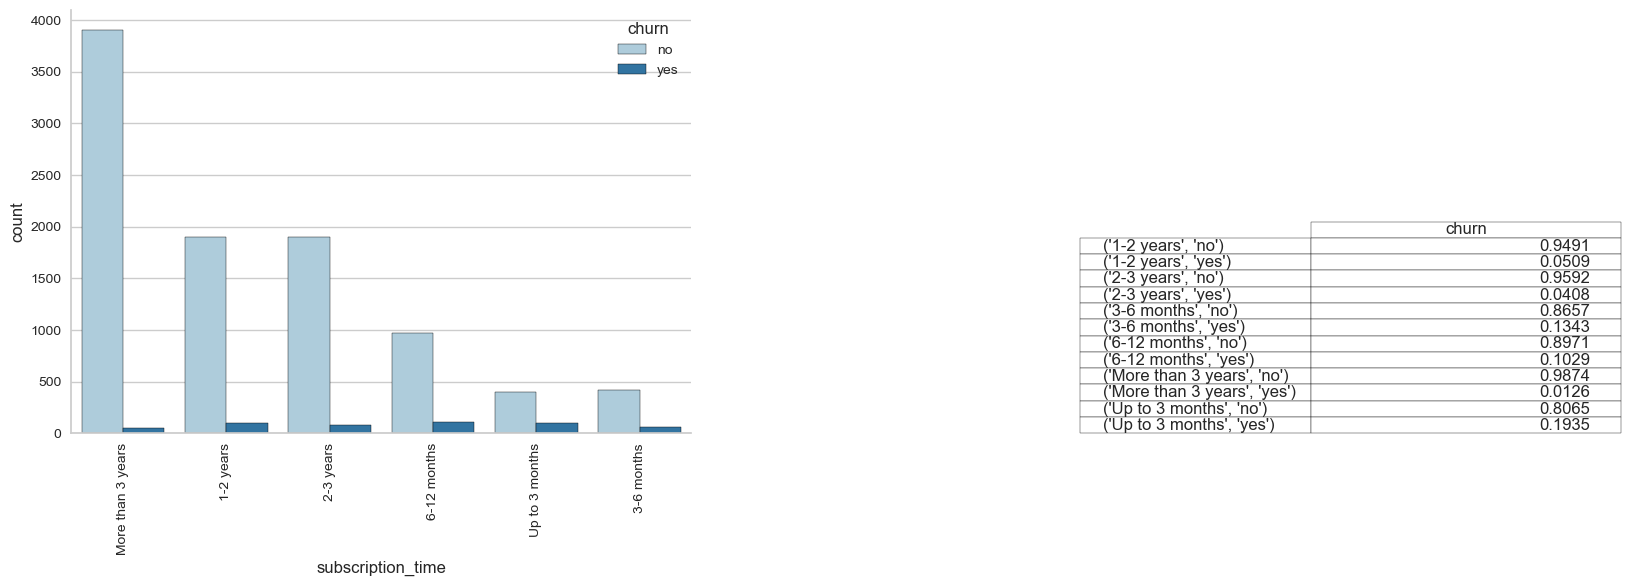

In [817]:
demo_features = ['subscription_time']
for feature in demo_features:
    CountPlot_Table(feature)

# Análise multivariada

Vamos continuar investigando e ver se alguma outra varíavel além do tempo do assinatura contribui para o churn de clientes.

<Axes: xlabel='tenure', ylabel='all_revenue'>

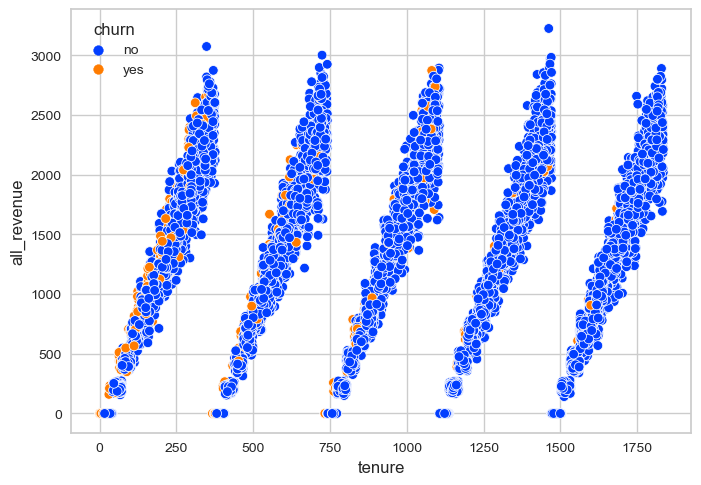

In [818]:
sns.scatterplot(data = df,y=df["all_revenue"], x='tenure',hue='churn',palette = 'bright')

Nesse gráfico de dispersão é possível observar que o churn é muito mais concentrado em clientes com pouco tempo de assinatura e com gasto moderado, por volta 2000.

<Axes: >

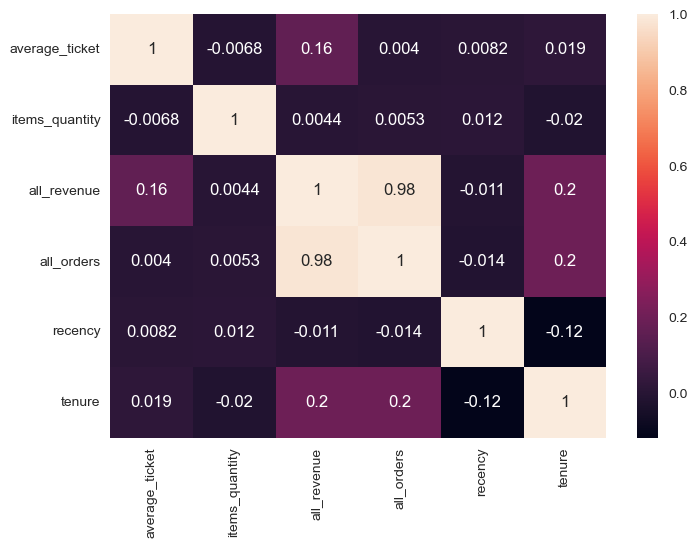

In [819]:
sns.heatmap(df.corr(),annot=True)



A única correlação alta entre variaveis da base é entre pedidos('all_ordes') e receita regerada pelo cliente('all_revenue'), o que faz todo sentido e não contribui tanto para a análise aqui proposta.

## Análise de correspondência

In [820]:
#Carregando bibliotecas 
import prince
import scipy.stats as stats 

In [821]:
#Criando dataframe com as variavéis categóricas criadas para tentar observar uma relação melhor entre elas.
data = df[['ticket_type','expense','subscription_time','items_pattern','orders_qtd','churn']]

In [822]:
data.head()

,ticket_type,expense,subscription_time,items_pattern,orders_qtd,churn
0,below average,moderate,More than 3 years,6 to 10,5-10,no
1,above average,low,1-2 years,until 5,until 2,no
2,average,very high,1-2 years,more than 10,more than 8,no
3,average,moderate,2-3 years,6 to 10,5-10,no
4,above average,very high,2-3 years,6 to 10,5-10,no


In [823]:
chi2, pvalor, graus_liberdade, valores_esperados = stats.chi2_contingency(tabela)
print(f'chi2 = {chi2:.2f} e p-valor = {pvalor:}')

chi2 = 758.50 e p-valor = 1.6706546155044894e-50


Como o p-valor é menor que 0.05 a relação entre as variveis é estatísticamente significante

In [824]:
#Ajustando o modelo de análise de corresponcia múltipla para os dados
mca = prince.MCA(n_components = 2)
mca = mca.fit(data)


In [825]:
print(mca.row_coordinates(data), "\n")
print(mca.column_coordinates(data))

             0         1
0    -0.272326  0.374260
1     0.858542 -0.131376
2    -0.391882 -0.803345
3    -0.277514  0.297652
4    -0.346485 -0.443970
...        ...       ...
9995 -0.260526  0.695136
9996 -0.369844 -0.825154
9997 -0.298794  0.297667
9998  0.868266 -0.119641
9999 -0.391124 -0.825139

[10000 rows x 2 columns] 

                                            0         1
ticket_type_above average           -0.027425 -0.130746
ticket_type_average                 -0.020855 -0.037417
ticket_type_below average            0.077046  0.228913
expense_high                        -0.642799 -0.556611
expense_low                          1.645836 -0.175973
expense_moderate                    -0.441959  1.068623
expense_very high                   -0.690505 -1.416798
subscription_time_1-2 years         -0.022871 -0.012808
subscription_time_2-3 years          0.037059 -0.022242
subscription_time_3-6 months        -0.282744  2.126231
subscription_time_6-12 months       -0.928544 -0.680596


In [826]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.380,14.25%,14.25%
1,0.336,12.59%,26.85%


In [827]:
## Os dois componentes explicaram só 26% dos dados

In [828]:
# Inércia principal total
print(mca.total_inertia_)



2.6666666666666576


In [829]:
data=pd.read_csv('./data/cma.csv',sep=';')

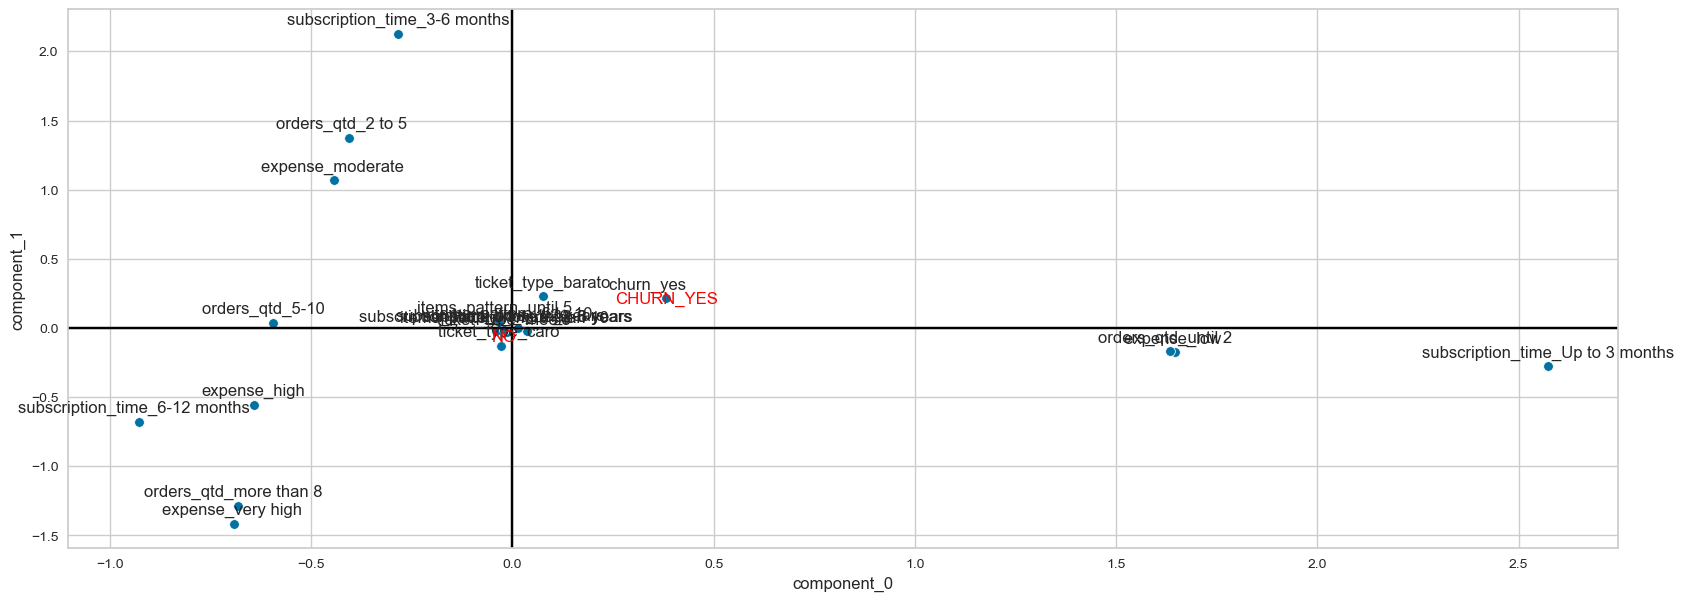

In [830]:
#plotando o mapa perceptual das categorias

anott = data.category.values
plt.figure(figsize=(20,7))
g=sns.scatterplot(data =data, x = 'component_0',y='component_1')
for i, txt in enumerate(anott):
    g.annotate(txt, (data.component_0[i], data.component_1[i]+0.1),va="center", ha="center")
plt.axvline(x = 0, color = 'black', label = 'axvline - full height')
plt.axhline(y = 0, color = 'black', label = 'axvline - full height')
plt.text(0.382007 ,0.213572,"CHURN_YES",color = 'red',va="center", ha="center")
plt.text(-0.020317 ,-0.011359,"NO",color = 'red',va="top", ha="center")
plt.show()

O mapa perceptual traz arelações entre as categorias de cada varíavel. Apesar da visualização ruim é possível notar que realmente **as categorias com mais relação com o churn = YES são: tempo de assinatura até 3 meses, número de pedidos até 2 e que gastão pouco**. Dou outro lado, quem não cancela a assinatura, churn = NO, são clientes com grande tempo de assinatura, que gastam mais com mais pedidos são os clientes retidos e mais fieis.

## Clustering

Com a clusterização é possível agrupar os clientes que cancelaram a assinatura e observar melhor seu perfil.

In [835]:
#Importando bibliotecas 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

#Selecionando as variveis numéricas e que impactam no churn 
all_revenue_and_tenure = df[['tenure','all_revenue','all_orders','average_ticket','items_quantity']][df.churn == 'yes']

#´Balanceando o valores das variaveis para não afetar o modelo
scaler = MinMaxScaler() # estanciando o modelo
all_revenue_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(all_revenue_and_tenure)) #ajustando o modelo e criando o dataframe
all_revenue_and_tenure_standardized.columns = ['tenure','all_revenue','all_orders','average_ticket','items_quantity'] 

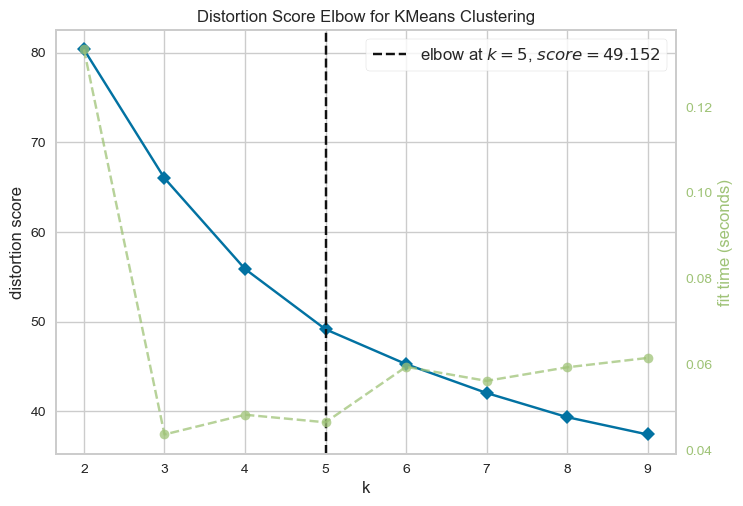

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [836]:
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer



# Instancicando o modelo e visualizando
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(all_revenue_and_tenure_standardized ) #Treinado para os dados b      
visualizer.show()  

O elbow método e o shilhoutte score são métricas para auxiliar a escola do número de cluster na análise de clusterização. Para esse problema serão usado 5 cluster de acordo com valor obtido com a biblioteca yellowbrick.

In [837]:
kmeans = KMeans(n_clusters =5, random_state = 42).fit(all_revenue_and_tenure) #Treinando o modelo agora com 5 clusters

all_revenue_and_tenure_standardized['cluster'] = kmeans.labels_ # retornando o número do cluster para o conjunto de dados original

In [838]:
all_revenue_and_tenure['cluster'] = kmeans.labels_

In [839]:
all_revenue_and_tenure

,tenure,all_revenue,all_orders,average_ticket,items_quantity,cluster
12,558.0,1140.106424,6,190.017737,9,3
22,446.0,468.415636,2,234.207818,11,1
33,165.0,1076.119241,5,215.223848,10,3
63,1295.0,1267.800790,6,211.300132,6,0
86,13.0,0.000000,0,214.151632,15,1
...,...,...,...,...,...,...
9817,4.0,0.000000,0,183.850017,9,1
9840,495.0,899.536020,4,224.884005,4,3
9927,215.0,1632.986947,7,233.283850,3,2
9945,12.0,0.000000,0,231.366753,11,1


Text(0, 0.5, 'Tempo de Assinatura')

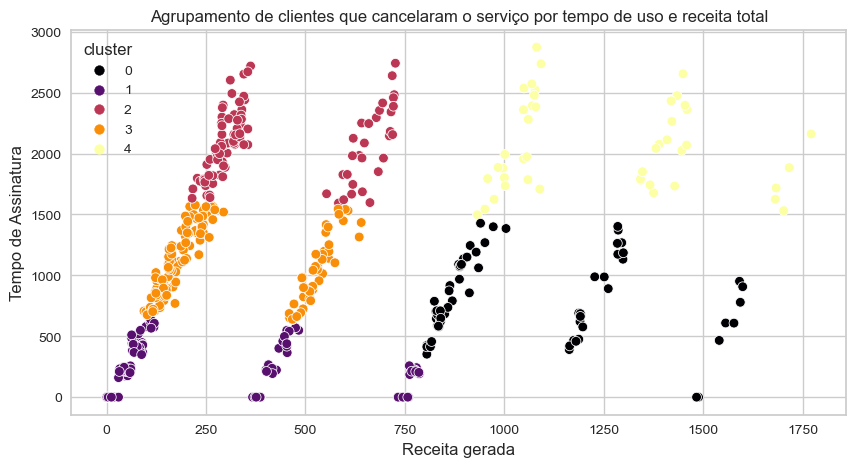

In [840]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data= all_revenue_and_tenure,x = 'tenure',y = 'all_revenue', hue = 'cluster',palette = 'inferno')
plt.title('Agrupamento de clientes que cancelaram o serviço por tempo de uso e receita total')
plt.xlabel('Receita gerada')
plt.ylabel('Tempo de Assinatura')

In [841]:
all_revenue_and_tenure.groupby('cluster').count()[['tenure']]\
.rename(columns = {'tenure':'clients'}).sort_values(by='clients',ascending=False)

,clients
cluster,
1,154
3,145
2,95
0,66
4,45


**A análise de cluster reafirma as análises anteriores e mostra que a maioria dos clientes estão no cluster 1 e 3, que são clientes com pouco tempo de assinatura (novos) e que não gastam tanto. As ações devem ser direcionadas para esse perfil de clientes para amenizar o problema de churn de assinaturas.**